# Project Overview:
In this data analytics project, I will analyze an e-commerce dataset to uncover trends in sales, customer behavior, and popular products. The goal is to provide insights into peak sales periods and purchasing patterns.

# Questions that need to be answered:
1. How was the sales trend over the months?
2. What are the most frequently purchased products?
3. How many products does the customer purchase in each transaction?
4. Based on your findings, what strategy could you recommend to the business to gain more profit?

# Data Source:
An e-commerce dataset containing sales transactions, customer demographics, product details, and profit information.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)
cf.go_offline()
cf.set_config_file(theme='space', sharing='public', offline=True)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Load Data
Here we are loaing the dataset.
Then we are going to run the dataset and then get a preview of the data from the most recent transactions.

In [4]:
df = pd.read_csv("/kaggle/input/ukecommerce/Sales Transaction v.4a.csv")
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


Now we are going to view a preview of the dataset from the first transactions in the dataset.

In [5]:
df.tail()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
536345,C536548,12/1/2018,22168,Organiser Wood Antique White,18.96,-2,12472.0,Germany
536346,C536548,12/1/2018,21218,Red Spotty Biscuit Tin,14.09,-3,12472.0,Germany
536347,C536548,12/1/2018,20957,Porcelain Hanging Bell Small,11.74,-1,12472.0,Germany
536348,C536548,12/1/2018,22580,Advent Calendar Gingham Sack,16.35,-4,12472.0,Germany
536349,C536548,12/1/2018,22767,Triple Photo Frame Cornice,20.45,-2,12472.0,Germany


Next we are going to see how big the dataset is using df.shape

In [6]:
df.shape

(536350, 8)

This means the dataset has 536,350 rows and 8 columns

Next, we are going to look at the different columns in the dataset

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


**Additional info about the dataset:**
* TransactionNo (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
* Date (numeric): the date when each transaction was generated.
* ProductNo (categorical): a five or six-digit unique character used to identify a specific product.
* Product (categorical): product/item name.
* Price (numeric): the price of each product per unit in pound sterling (£).
* Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
* CustomerNo (categorical): a five-digit unique number that defines each customer.
* Country (categorical): name of the country where the customer resides.

Next, we are going to get a quick summary of the dataset

In [8]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,12.662182,9.919347,15227.893178
std,8.490450,216.662300,1716.582932
min,5.130000,-80995.000000,12004.000000
25%,10.990000,1.000000,13807.000000
50%,11.940000,3.000000,15152.000000
75%,14.090000,10.000000,16729.000000
max,660.620000,80995.000000,18287.000000


To fix any of the numbers missing in the dataset we are going to use df.isnull().sum()
to find all the null numbers

In [9]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [10]:
df[df['CustomerNo'].isnull()]

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
6511,C581406,12/8/2019,46000M,Polyester Filler Pad 45x45cm,6.19,-240,NaN,United Kingdom
6512,C581406,12/8/2019,46000S,Polyester Filler Pad 40x40cm,6.19,-300,NaN,United Kingdom
90098,C575153,11/8/2019,22947,Wooden Advent Calendar Red,44.25,-1,NaN,United Kingdom
102671,C574288,11/3/2019,22178,Victorian Glass Hanging T-Light,25.37,-1,NaN,United Kingdom
117263,C573180,10/28/2019,23048,Set Of 10 Lanterns Fairy Light Star,14.50,-1,NaN,United Kingdom
163160,C569495,10/4/2019,21843,Red Retrospot Cake Stand,21.47,-1,NaN,United Kingdom
190598,C567518,9/20/2019,22846,Bread Bin Diner Style Red,27.62,-1,NaN,United Kingdom
192284,C567518,9/20/2019,21871,Save The Planet Mug,11.94,-12,NaN,United Kingdom
242406,C563015,8/11/2019,46000M,Polyester Filler Pad 45x45cm,10.25,-160,NaN,United Kingdom
242407,C563015,8/11/2019,46000S,Polyester Filler Pad 40x40cm,10.25,-220,NaN,United Kingdom


**All the null values in CustomerNo have the same country and negative Quantity (except one, whose TransactionNo does not start with the letter 'C' and does not have a negative Quantity)**


Now, we are going to get rid of any of the null or duplicate values

In [11]:
df.dropna(inplace=True)
df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

In [12]:
df.duplicated().sum()

5200

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [14]:
df['CustomerNo'] = df['CustomerNo'].map(int)
df['CustomerNo'] = df['CustomerNo'].map(str)

# Answering our Questions:
**Let's quickly remind what we were looking for**
1. How was the sales trend over the months?
2. What are the most frequently purchased products?
3. How many products does the customer purchase in each transaction?
4. What are the most profitable segment customers?
5. Based on your findings, what strategy could you recommend to the business to gain more profit?

# 1. How was the sales trend over the months?

We are going to create two columns in the dataset where we get the total amount and the date of the month and year

First we are going to change the date format

In [18]:
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,257.64
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,383.40
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,138.36
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,127.80
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,71.64


In [19]:
df['Total'] = df['Quantity'] * df['Price']
df['Month_Year'] = pd.to_datetime(df['Date']).dt.to_period('M')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,Total,Month_Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490,United Kingdom,257.64,2019-12
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069,United Kingdom,383.40,2019-12
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069,United Kingdom,138.36,2019-12
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069,United Kingdom,127.80,2019-12
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069,United Kingdom,71.64,2019-12


Now, we are going to create a table where we have the total amount per month

In [20]:
total_month = df.groupby(['Month_Year'], as_index=False)['Total'].sum()
total_month.columns = ['Date', 'Total']
total_month.head()

,Date,Total
0,2018-12,4217281.53
1,2019-01,3638948.12
2,2019-02,3292324.69
3,2019-03,4340035.60
4,2019-04,3406002.17


**Here is a visual of the sales trends per month**

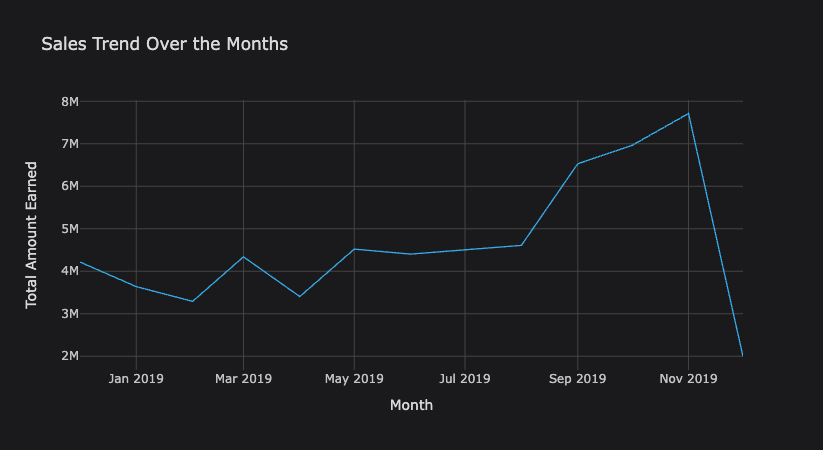

In [32]:
total_month.iplot(x = 'Date', y = 'Total', title = 'Sales Trend Over the Months', 
                  yTitle = 'Total Amount Earned', xTitle = 'Month', mode="lines", size = 8, colors = '#34abeb')

**Here is the visual for the number of sales each month**

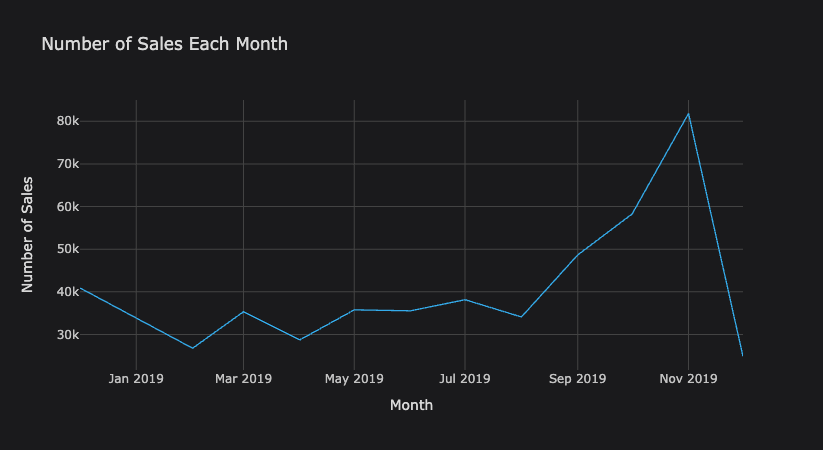

In [31]:
df_no_return = df[df['Quantity'] > 0]
number_of_sales = df_no_return.groupby(by='Month_Year', as_index=False)['Total'].count()
number_of_sales.columns = ['Date', 'Sum of sales']
number_of_sales.iplot(x = 'Date', y = 'Sum of sales', title = 'Number of Sales Each Month', 
                  yTitle = 'Number of Sales', xTitle = 'Month', mode="lines", size = 8, colors = '#34abeb')

**Analysis:**

We can see from the data that from December 2018 to August 2019 the company had no big changes to the income or number of sales but from September 2019 to November 2019 we got a big increase in income and the number of sales.

One can hypothesise that the reason for the increase in sales and income could be because the holidays were coming near. 

One issue with the dataset is that the data stopped on December 9th 2019, which leaves us with a month on incomplete data. Though we can hypothesise that the income and number of sales were also high due to high demand.

# 2. What are the most frequently purchased products?

**Here is the visual for the top 10 products sold**

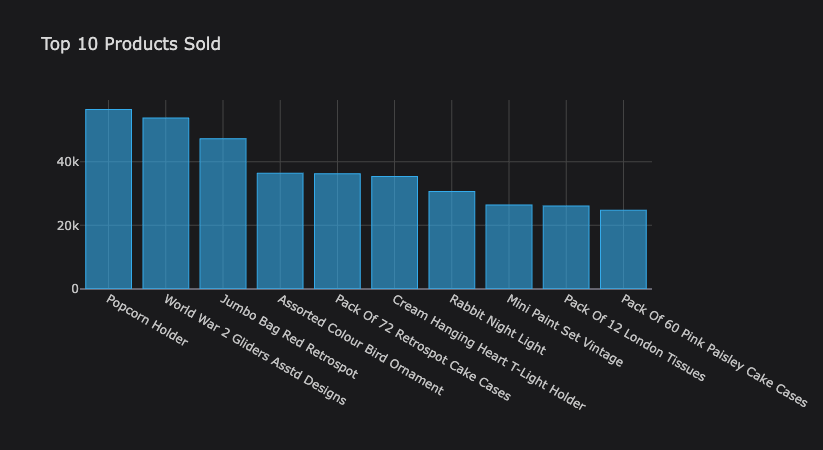

In [30]:
popular_products = df.groupby(by='ProductName', as_index = False)['Quantity'].sum()
popular_products.sort_values('Quantity', ascending = False).head(10).iplot(kind = 'bar', x = 'ProductName', y = 'Quantity', title = 'Top 10 Products Sold', colors = '#34abeb')

# 3. How many products does the customer purchase in each transaction?

Let's see how many products on average the customers purchase.

In [28]:
round(df_no_return['Quantity'].mean())

11

**Most customers order 11 items in each transaction.**

# 4. Based on your findings, what strategy could you recommend to the business to gain more profit?


To answer this question we need to find the most canceled items

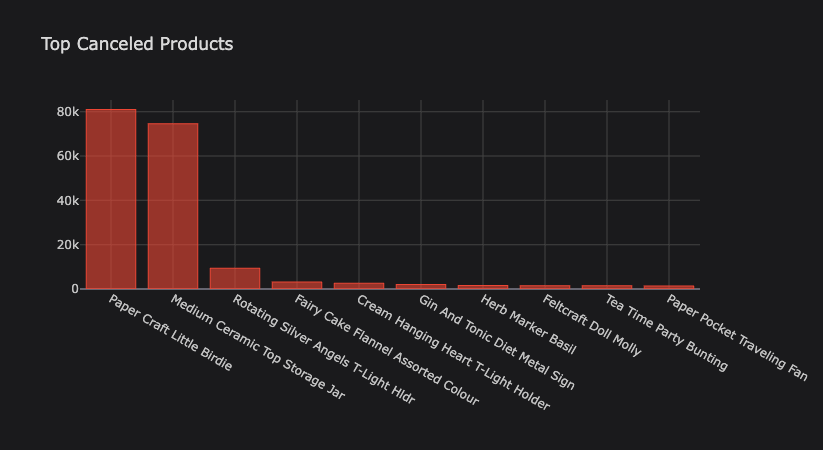

In [33]:
df_negative_quantity = df[df['Quantity'] < 0]
df_negative_quantity['Quantity'] = abs(df_negative_quantity['Quantity'])
df_negative_quantity.groupby(by = 'ProductName', as_index = False)['Quantity'].sum().sort_values('Quantity', ascending = False).head(10).iplot(kind = 'bar', x = 'ProductName', y = 'Quantity',
                                                                                                                                              title = 'Top Canceled Products', colors = '#eb4634')

# My Recommendations:

1. I would suggest that the company should see why the first two products on 'Top Canceled Products' were the most canceled items in the inventory. The company ended up losing over 150k orders because of these two products' order cancelation.

2. I would suggest that the company should increasing the advertising budget, making sure that throughout the year they advertise will help them bring in more customers and more revenue.

3. I would also suggest that they keep the data as current as possible so we can always run analysis and see what changes need to be made and to also see what has been working. 